## Advanced Lane Finding Project

### The goals / steps of this project are the following:

#### Pipeline Processes:
Step 1) Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

Step 2) Apply a distortion correction to raw images.

Step 3) Use color transforms, gradients, etc., to create a thresholded binary image.

Step 4) Apply a perspective transform to rectify binary image ("birds-eye view").

Step 5) Detect lane pixels and fit to find the lane boundary.

Step 6) Determine the curvature of the lane and vehicle position with respect to center.

Step 7) Warp the detected lane boundaries back onto the original image.

Step 8) Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---


## Helper Function

- This function collection has functions, assisting us to complete each step and debug tracks in the pipeline process. 

In [14]:
#import some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon
import numpy as np
import cv2
import glob

%matplotlib inline

def display_plots(imgs, names, rows=0, cols=0):
    '''
    @ parameters
    imgs = images
    names = names of images stored in the directory
    rows = size of rows to display images(default = 0)
    cols = size of columns to display images(default = 0)
    
    @ no return, but
    display image plot(s) with row x col matrix within this function
    '''
    
    # check parameters whether there exists 0 values in rows or cols to show row x col plots.
    if(rows == 0 and cols == 0):
        raise NotImplementedError("Please check rows and columns' values")
    
    # set template as rows x col matrix to display plots
    f, ax = plt.subplots(rows, cols, figsize=(24, 16))
    f.tight_layout()
    
    # If it is 1-D matrix, just display plots along with the size of columns
    if rows <= 1:
        for c in range(cols):
            ax[c].imshow(imgs[c])#, cmap='gray')
            ax[c].set_title(f'{names[c]}', fontsize = 32)
            ax[c].axis('off')
    # If it is 2-D matrix, just display plots along with rows x columns matrix
    else:
        # To iterate list for names and images, we need to count order 
        cnt = 0
        for r in range(rows):
            for c in range(cols):
                ax[r, c].imshow(imgs[cnt])#, cmap='gray')
                ax[r, c].set_title(f'{names[cnt]}\n', fontsize = 32)
                ax[r, c].axis('off')
                cnt += 1
    
    # find the picture name
    plt.suptitle(pic.split('/')[-1], fontsize = 40, y = 1)
    plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)
    

## Step1: Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

    In this step, we would find how to find camera calibration matrix(abbrev. mtx) and distortion coefficients with a set of chessboard images. In this project, we will use x = 9 and y = 6 instead of x = 8, y = 6 where x counts the number of corners in any row and y does in any column. Here is few processes how camera_calibration function works.

1. Receive parameters which are a path saved in images, nx and ny stored x and y values for each.

2. Create variables of object and image points to distinguish 3-D points and 2-D points.

3. Convert grayscale images from original images, so that it could find corners of images.

4. Draw corners for each images and stored those corner coordinates in the variables.

5. Compute matrix and distorted coefficients by means of object and image points.

6. return the values of matrix and distorted coefficients.


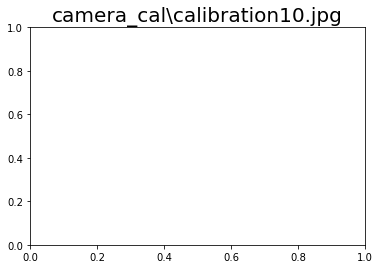

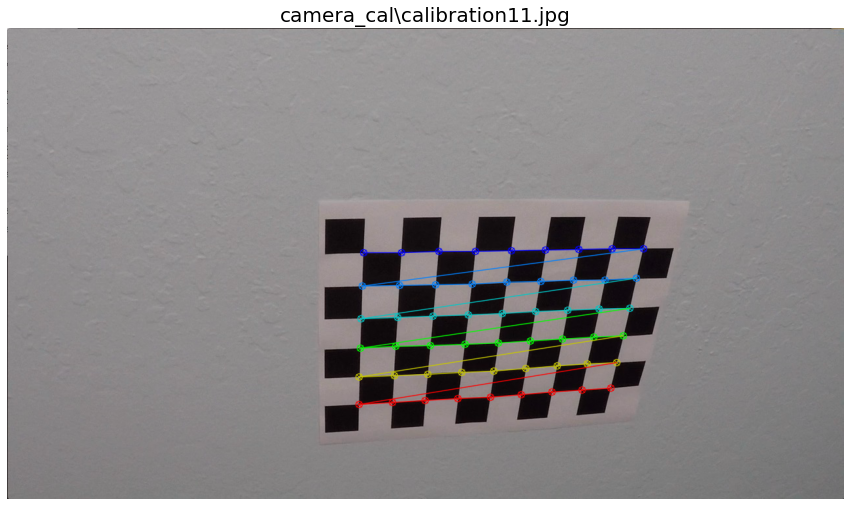

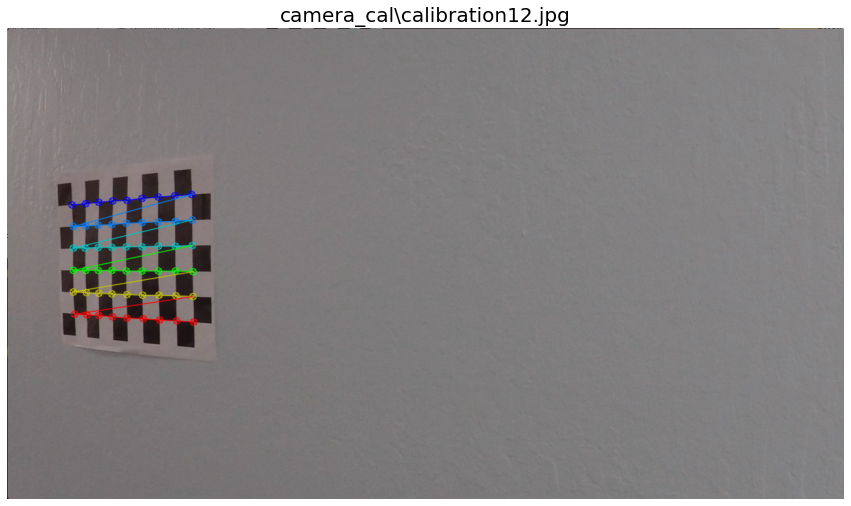

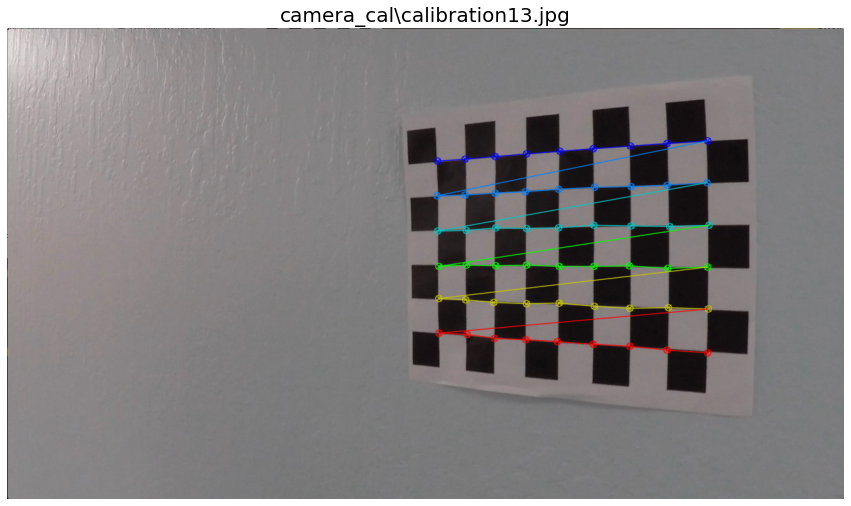

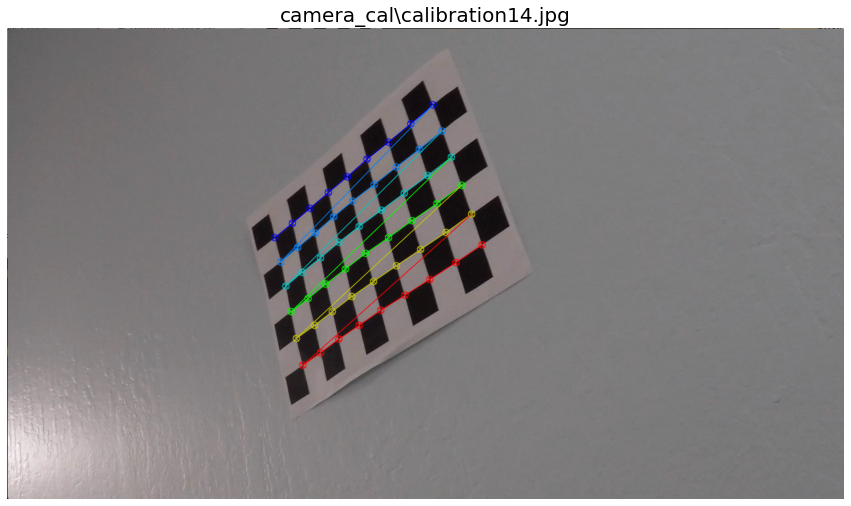

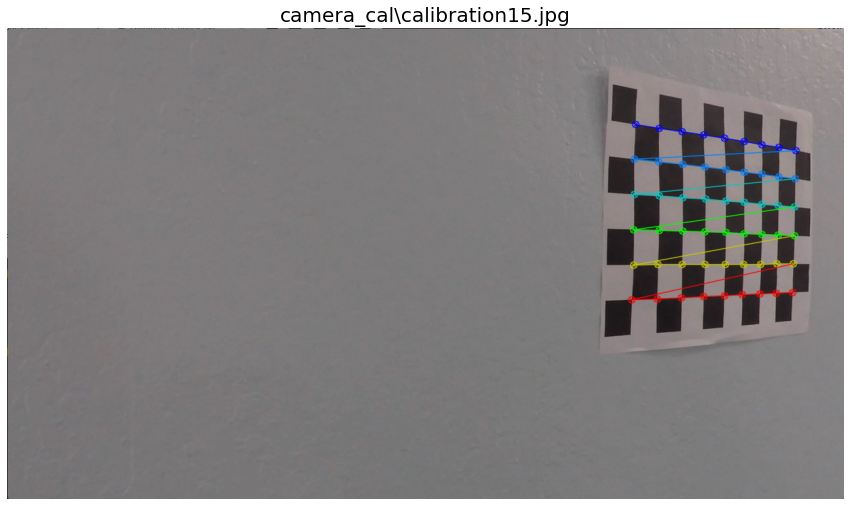

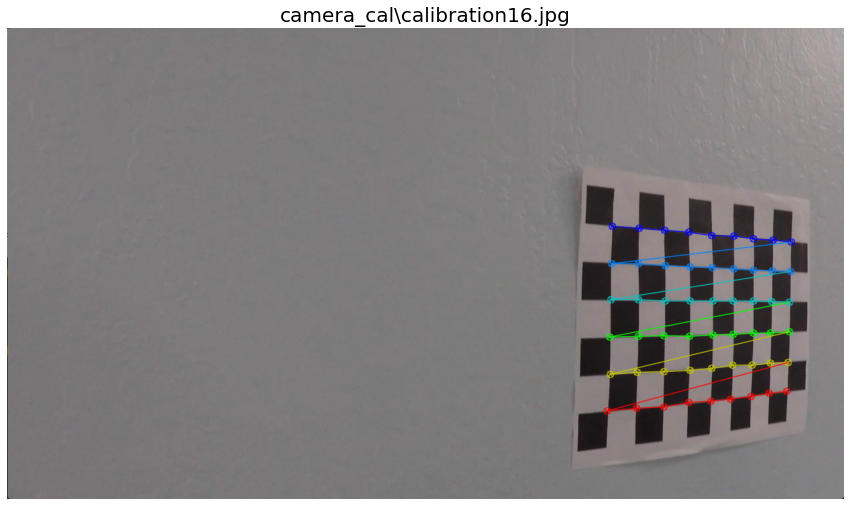

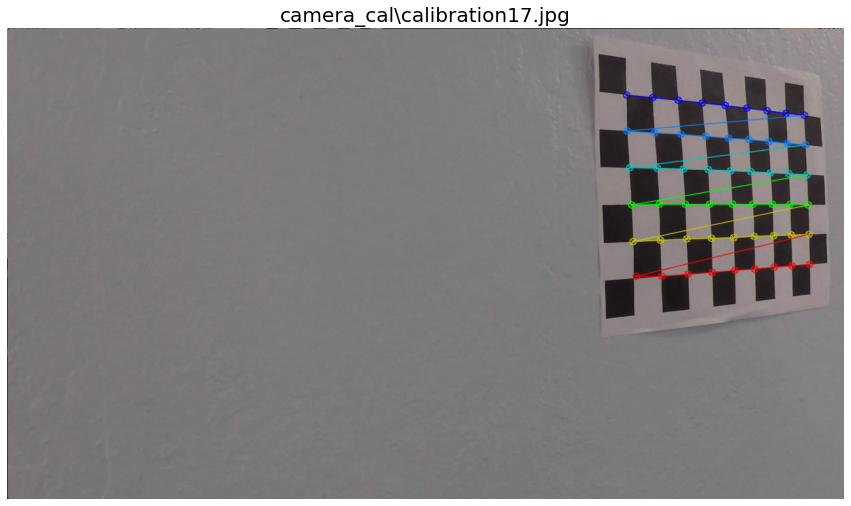

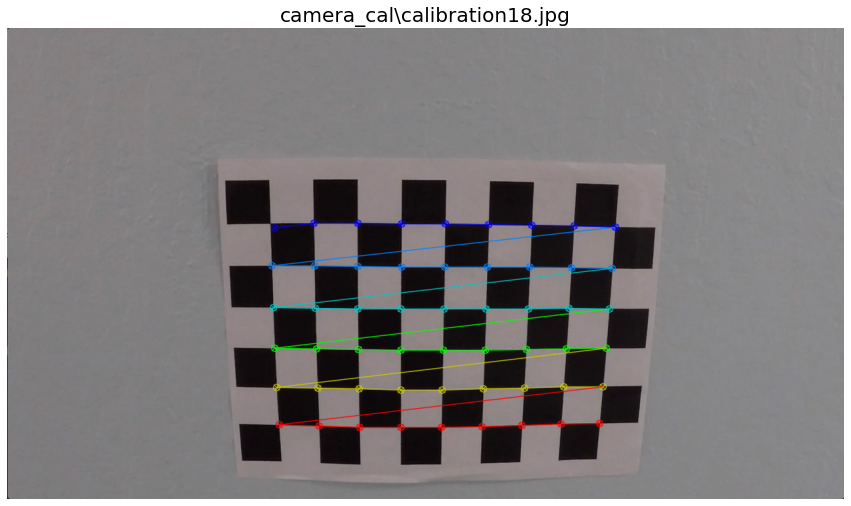

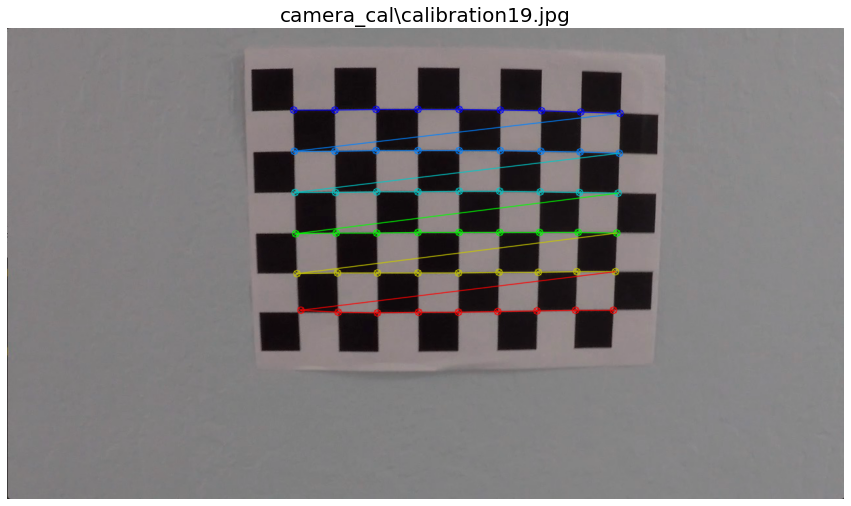

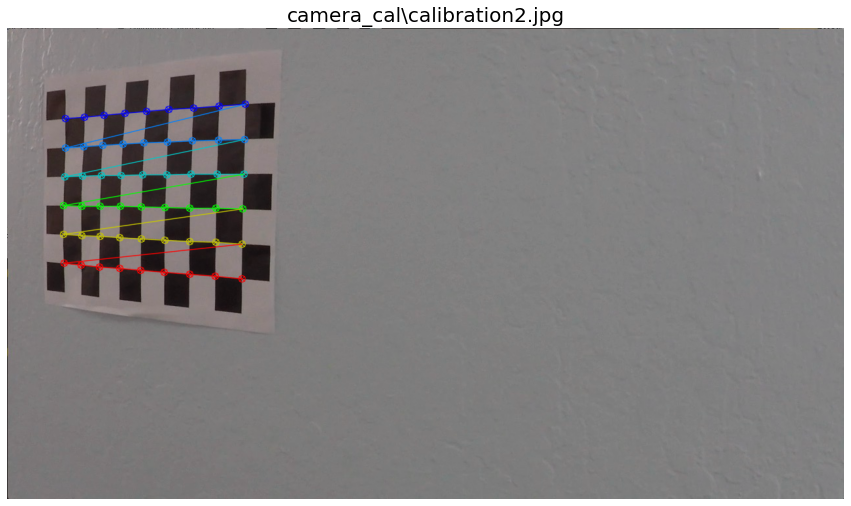

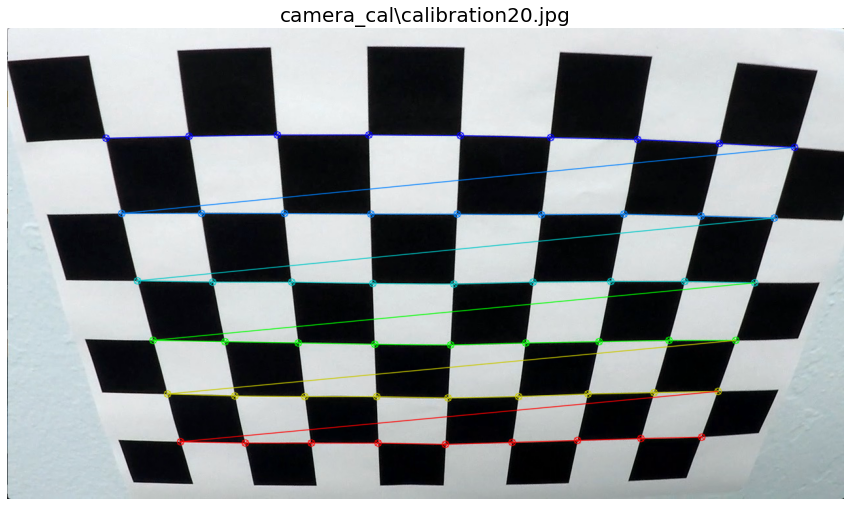

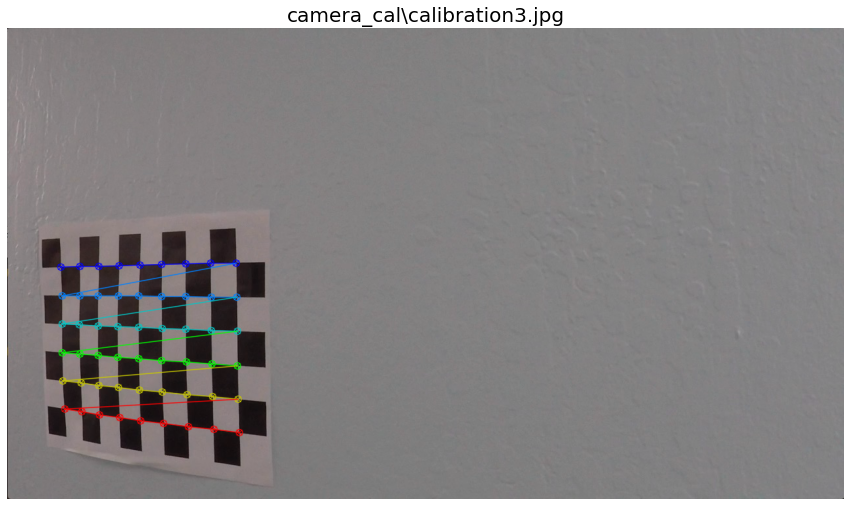

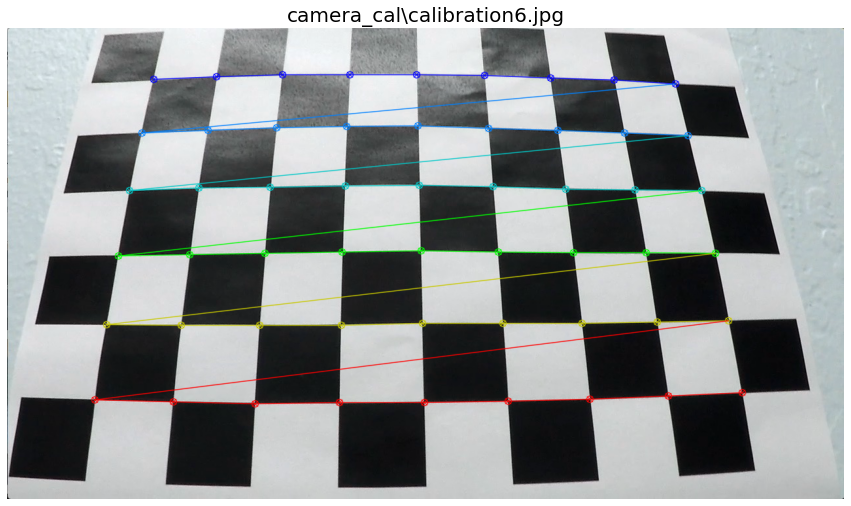

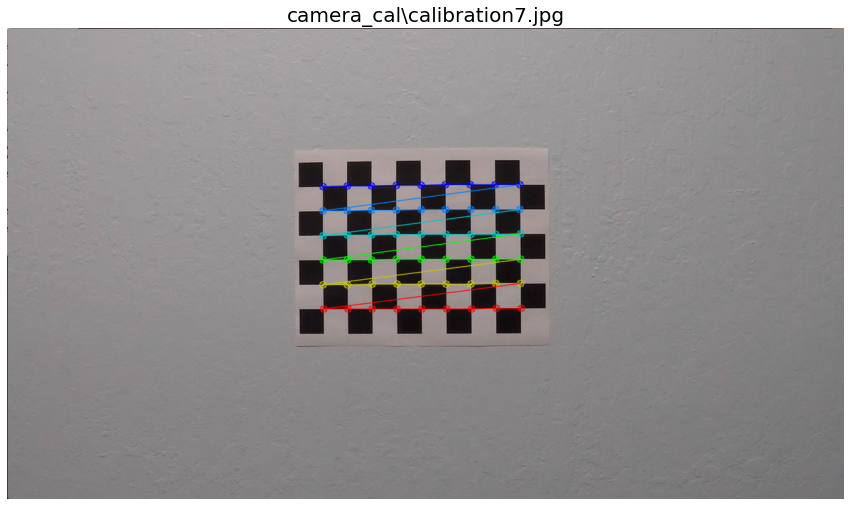

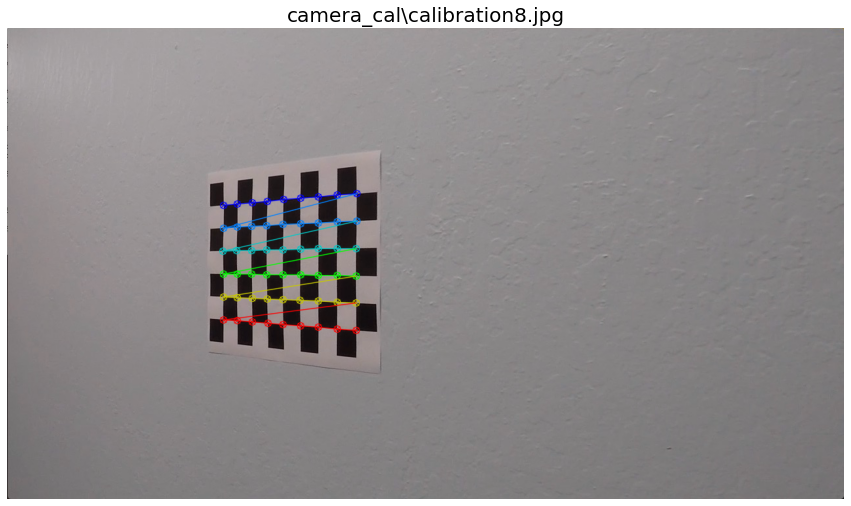

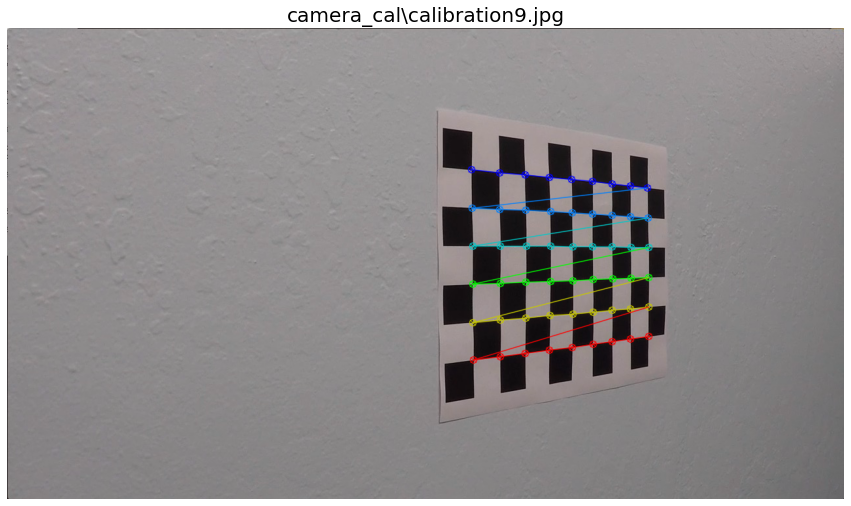

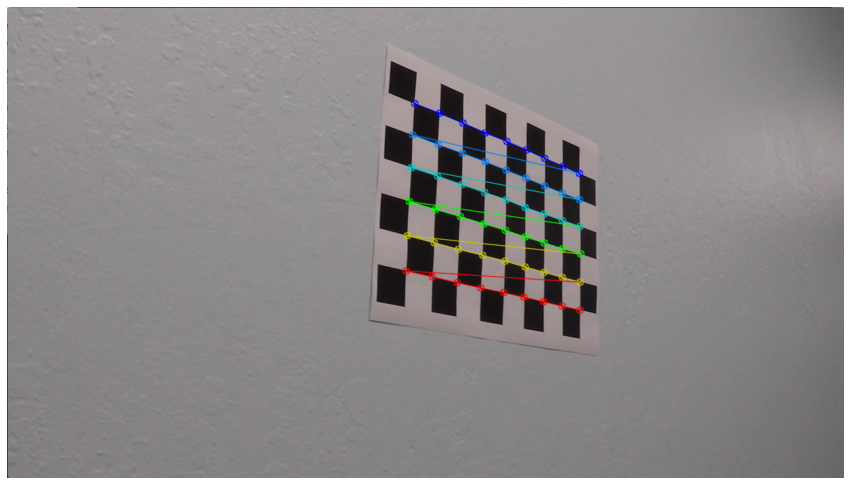

In [15]:
def camera_calibration(img_path, nx=0, ny=0):
    '''
    @ parameter
    img_path = path of images
    nx = 9 as x object points
    ny = 6 as y object points
    
    @ return
    mtx = camera matrix
    dist = distortion coefficients
    '''
    # Before starting, screen the parameters whether it passes correctly or not
    if nx != 9 or ny != 6:
        raise(NotImplementedError, "Please check nx, ny parameters to pass")
    
    # Make a list of calibration images
    cal_images_names = glob.glob(img_path)
    
    # Code is from CarND-Camera-Calibration, which is challenge assignment
    # Prepare object points, like (x,y,z) = (0,0,0), (1,0,0), (2,0,0) ....,(9,6,0)
    objp = np.zeros((ny*nx,3), np.float32)
    
    # It means when z = 0, find x and y coordinates
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    # Step through the list and search for chessboard corners
    for fname in cal_images_names:
        # Read in an image
        img = cv2.imread(fname)
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Find chessboard corners where ret is return value(abbrev.)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
        # If the corners are found, add object and image points.
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            # Draw and display the corners in images
            plt.title('{}'.format(fname.split('/')[-1]), fontsize = 20)
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.figure(figsize=(15, 10))
            plt.axis('off')
            plt.imshow(img)
            
    # Do camera calibration given object points and image points
    img_size = gray.shape[::-1]
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    # Those parameters are important to unwarp images since they have calibration values.
    return mtx, dist

# set path which will test car images
test_paths = glob.glob('test_images/*')

# Chess-board parameters
nx, ny = 9, 6

# camera calibration step
mtx, dist = camera_calibration('./camera_cal/calibration*.jpg',nx, ny)

## Step 2) Apply a distortion correction to raw images.

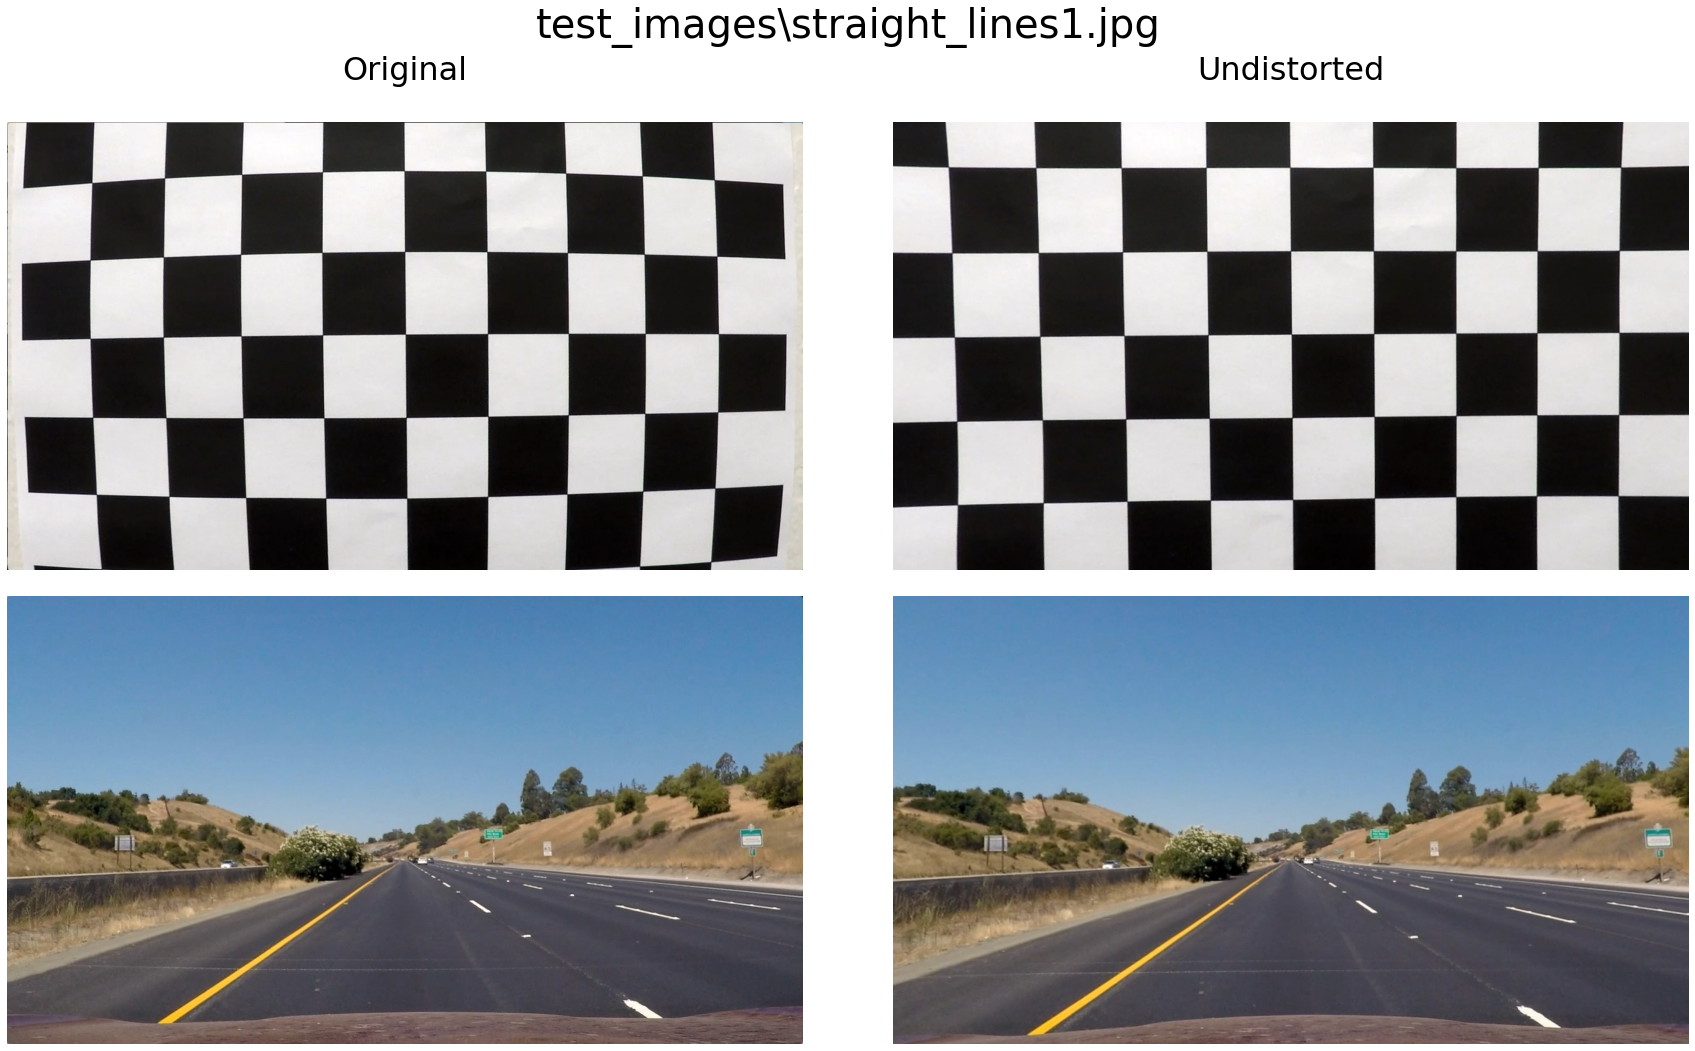

In [17]:
# Call an image of a car in a road
pic = test_paths[0]
car_img = mpimg.imread(pic)


def undistort_func(img, mtx, dist):
    '''
    @ parameter
    img = original image
    mtx = matrix from camera_calibration
    dist = distort coefficient from camera_calibration
    
    @ return
    un_dst = undistorted image
    '''
    un_dst = cv2.undistort(img, mtx, dist, None, mtx)
    return un_dst

# Test an image about chessboard
img = mpimg.imread('./camera_cal/calibration1.jpg')
#chessboard_imgs = glob.glob('./camera_cal/calibration*.jpg')

# Undistort car images and chessboard images
undistorted_car = undistort_func(car_img, mtx, dist)
undistorted_img = undistort_func(img, mtx, dist)
'''images = []
names = ['Original', 'Undistorted']
for chessboard_img in chessboard_imgs:
    img = mpimg.imread(chessboard_img)
    undistorted_img = undistort_func(img, mtx, dist)    
    images.extend([img, undistorted_img])
    names.extend(['',''])'''

# display distorted images and undistorted images
images = [img, undistorted_img, car_img, undistorted_car]
names = ['Original','Undistorted','', '']
#display_plots(images, names, len(chessboard_imgs), 2)
display_plots(images, names, 2, 2)